In [35]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

In [36]:
df = pd.read_csv('homeprices_banglore.csv')
df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [37]:
from sklearn import preprocessing
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_x = sx.fit_transform(df.drop('price',axis='columns'))
scaled_x



array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [38]:
scaled_y = sy.fit_transform(df.price.values.reshape(df.shape[0],1))
scaled_y


array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

Batch Gradient Descent


In [39]:
w =np.ones(shape=(2))

In [40]:
scaled_x.T #T is transpose

array([[0.08827586, 0.62068966, 0.22068966, 0.24862069, 0.13793103,
        0.12758621, 0.6662069 , 0.86206897, 0.17586207, 1.        ,
        0.34482759, 0.68448276, 0.06896552, 0.10344828, 0.5       ,
        0.12931034, 0.13103448, 0.25517241, 0.67931034, 0.        ],
       [0.25      , 0.75      , 0.5       , 0.5       , 0.25      ,
        0.25      , 0.75      , 0.75      , 0.5       , 1.        ,
        0.5       , 0.75      , 0.25      , 0.25      , 0.5       ,
        0.25      , 0.5       , 0.5       , 0.5       , 0.        ]])

In [41]:
np.dot(w,scaled_x.T )

array([0.33827586, 1.37068966, 0.72068966, 0.74862069, 0.38793103,
       0.37758621, 1.4162069 , 1.61206897, 0.67586207, 2.        ,
       0.84482759, 1.43448276, 0.31896552, 0.35344828, 1.        ,
       0.37931034, 0.63103448, 0.75517241, 1.17931034, 0.        ])

In [50]:
def batch_gradient_descent(X,y_true,epochs,learning_rate=0.1):
    number_of_features =X.shape[1]
    
    w = np.ones(shape=(number_of_features))
    b=0
    total_sample =X.shape[0]
    cost_list = []
    epoch_list = []
    
    
    for i in range (epochs):
        y_pred= np.dot(w,scaled_x.T ) + b # w1 * area + w2 * bedrooms + bias
        
        # gradient
        w_grad = -(2/total_sample)*(X.T.dot(y_true-y_pred))
        b_grade = -(2/total_sample)*np.sum(y_true-y_pred)
        
        # adjust weights
        w = w - learning_rate * w_grad
        b=  b - learning_rate * b_grade
        
        # cost
        cost = np.mean(np.square((y_true-y_pred)))
        if i % 10 ==0 :
            cost_list.append(cost)
            epoch_list.append(i)
    return w, b ,cost, cost_list,epoch_list

w,b,cost,cost_list,epoch_list=batch_gradient_descent(scaled_x,scaled_y.reshape(scaled_y.shape[0],),500)
w,b,cost 
    

(array([0.75550442, 0.41573953]), -0.11682769564715854, 0.0034268126227234427)

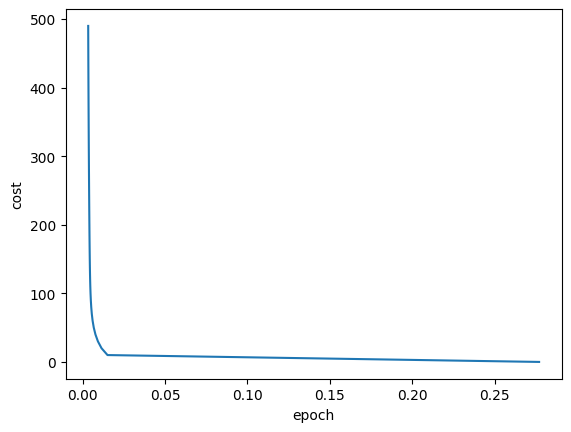

In [51]:
plt.xlabel('epoch')
plt.ylabel('cost')
plt.plot(cost_list,epoch_list)


predict function


In [54]:
sx.transform([[2600,4]])


c:\Users\codea\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[0.62068966, 0.75      ]])

In [55]:
w


array([0.75550442, 0.41573953])

In [58]:
sy.inverse_transform([[1,0.5,0]])

array([[167. ,  99.5,  32. ]])

In [59]:
def predict(area,beds,w,b):
    scaled_x = sx.transform([[area,beds]])[0]
    
    scaled_price =w[0]*scaled_x[0]+w[1]*scaled_x[1]+b 
    
    return sy.inverse_transform([[scaled_price]])[0][0]

    

predict(2600,4,w,b)

c:\Users\codea\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


121.6279485426776

In [60]:
predict(1000,2,w,b)


c:\Users\codea\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


37.293476976103996

Stochastic Gradient descent


In [68]:
import random

def stochastic_gradient_descent(X,y_true,epoch,learning_rate =0.1):
    number_of_features = X.shape[1]
    w = np.ones(shape=number_of_features)
    b=0
    total_sample = X.shape[0]
    
    cost_list= []
    epoch_list=[]
    
    for i in range (epoch):
        random_index=random.randint(0,total_sample-1)
        sample_x =X[random_index]
        sample_y = y_true[random_index]
        y_pred  = np.dot(w,sample_x.T)+b
        # gradient
        w_grad = -(2/total_sample)*(sample_x.T.dot(sample_y-y_pred))
        b_grade = -(2/total_sample)*np.sum(sample_y-y_pred)
        
        # adjust weights
        w = w - learning_rate * w_grad
        b=  b - learning_rate * b_grade
        # cost
        cost = np.mean(np.square((sample_y-y_pred)))
        if i % 100 ==0 :
            cost_list.append(cost)
            epoch_list.append(i)
    return w, b ,cost, cost_list,epoch_list
        
w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(scaled_x,scaled_y.reshape(scaled_y.shape[0],),10000)
w_sgd, b_sgd, cost_sgd

(array([0.75635482, 0.41760283]), -0.12377790286590323, 0.0026761688839580687)

In [69]:
w,b

(array([0.75550442, 0.41573953]), -0.11682769564715854)

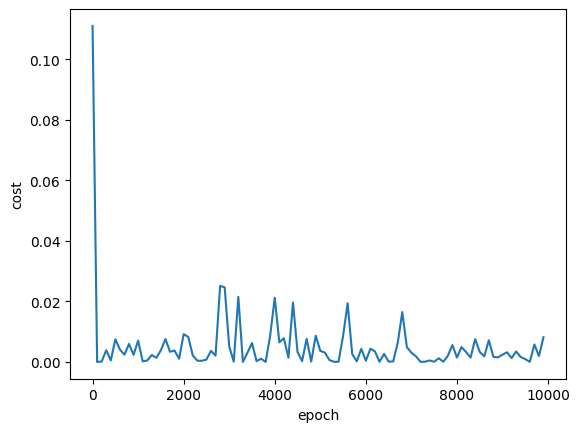

In [70]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_sgd,cost_list_sgd)

In [71]:
predict(2600,4,w_sgd,b_sgd)

c:\Users\codea\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


120.9495875799135

In [72]:
predict(1000,2,w_sgd,b_sgd)


c:\Users\codea\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


36.426002864810535